# Airline Safety Visualization Project

# Mary Donovan Martello

## The goal of this project was to effectively tell a story with data to different types of audiences. The topic was to examine airline safety data, determine how safe current airline travel is, and tell the story to an internal data science audience, internal executive audience, and to an external audience via a blog, an infographic, and a presentation.  This notebook includes the code for the infographic to an external audience.

# Task 4:  Infographic

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import squarify    
from collections import defaultdict
import matplotlib.ticker as ticker
import plotly.express as px
from matplotlib.ticker import ScalarFormatter
from matplotlib.patches import Ellipse
from matplotlib.text import OffsetFrom
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import StrMethodFormatter


In [2]:
#import data
map = pd.read_excel('InfographData.xlsx', sheet_name=1)
bub = pd.read_excel('InfographData.xlsx', sheet_name=2)
pie = pd.read_excel('InfographData.xlsx', sheet_name=0)
miles = pd.read_excel('InfographData.xlsx', sheet_name=3)
recent = pd.read_excel('InfographData.xlsx', sheet_name=4)

In [3]:
map.head()

,Year,Flight,Location,Latitude,Longitude
0,2021,Sriwijaya Air Flight 182,"Soekarno-Hatta International Airport, Java, In...",-6.125556,106.655830
1,2020,Air India Express Flight 1344,Kozhikode International Airport,11.139700,75.950800
2,2020,Pakistan International Airlines Flight 8303,Jinnah International Airport,24.899994,67.168259
3,2020,Pegasus Airlines Flight 2193,"Istanbul-Sabiha Gökçen International Airport, ...",40.898335,29.309168
4,2019,Bek Air Flight 2100,Almaty International Airport.,43.229530,76.976494


In [4]:
map.shape

(17, 5)

In [6]:
# https://plotly.com/python/scatter-plots-on-maps/ 

# plot disappears when the file is closed; need to run it each time

import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
    lon = map['Longitude'],
    lat = map['Latitude'],
    mode = 'markers',
    marker_color = "red"
    ))

fig.update_layout(
        title = 'Fatal Commercial Passenger Airline Crashes since 2018'
    )
fig.show()

In [17]:
bub.head()

,Mode,X,Y,Ave
0,Air,7,15,1.5
1,Auto,15,15,113.1
2,Fill,40,40,15.0
3,Fill2,2,2,15.0


In [59]:
bub = pd.read_excel('InfographData.xlsx', sheet_name=2)

### Source for infographic

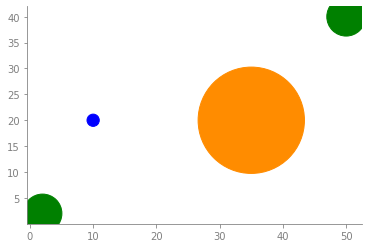

In [60]:
plt.scatter(x=bub['X'], y=bub['Y'], s=bub['Ave']*100, alpha=1.0, color=['blue','darkorange', 'green', 'green'])

In [26]:
pie.tail()

,Year,US Fatalities,World Fatalities,Foreign only
18,2018,1,562,561
19,2019,1,287,286
20,20 total,779,13783,13004
21,15 total,124,9122,8998
22,10 total,2,4994,4992


In [39]:
# set reParams
plt.rcParams.update({
    #"figure.facecolor":  (1.0, 0.0, 0.0, 0.0),  # red   with alpha = 100%
    #"axes.facecolor":    (0.0, 1.0, 0.0, 0.0),  # green with alpha = 100%
    #"savefig.facecolor": (0.0, 0.0, 1.0, 0.0),  # blue  with alpha = 100%
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.labelcolor': 'grey',
    #'axes.titlecolor': 'grey',
    'text.color': 'grey',
    'xtick.color': 'grey',
    'ytick.color': 'grey',
    'axes.edgecolor': 'grey',
    })

### ### Source for infographic

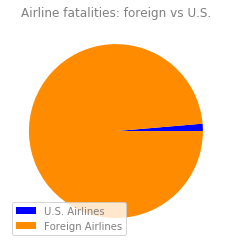

In [41]:
# set up the figure size - for a pie it should be a square
figPie = plt.figure(figsize=(4, 4))
labels = ['U.S. Airlines', 'Foreign Airlines']
values = [pie['US Fatalities'][21], pie['Foreign only'][21]]
colors = ['b', 'darkorange']
patches, texts = plt.pie(values, colors=colors)
plt.title('Airline fatalities: foreign vs U.S.')
plt.legend(patches, labels, loc="lower left")
plt.show()

In [33]:
arrow.head()

,Year,US Fatalities,US Air Miles
0,2000,89,692.757241
1,2001,531,651.700325
2,2002,0,642.438958
3,2003,22,657.322948
4,2004,13,733.993053


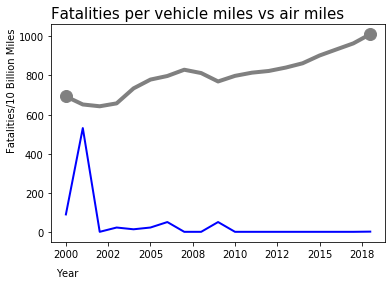

In [35]:
# us fatalities vs miles traveled
fig, ax = plt.subplots()
# ax.text(0.2, 0.2, 'Air Fatalities', transform=ax.transAxes, color='blue', fontsize=14, fontweight='bold')
# ax.text(0.5, 0.85, 'Auto Fatalities', transform=ax.transAxes, color='grey', fontsize=14, fontweight='bold')
# ax.text(0.2, 0.5, 'Air fatalities are always much lower than auto fatalties on the same scale', transform=ax.transAxes, 
#         color='navy', fontsize=12, fontweight='bold')
# ax.text(0.5, 0.4, 'Even with the 9/11 terrorist fatalities!', transform=ax.transAxes, color='navy', fontsize=12, fontweight='bold')
ax.plot(miles.Year, arrow['US Fatalities'], marker='', color='blue', linewidth=2)
#ax.plot(bill.Year, bill['Vehicle Miles'], marker='o', markerfacecolor='grey', markersize=12, color='grey', linewidth=4)
markers_on = [0, 18]
ax.plot(miles.Year, miles['US Air Miles'], marker='o', markerfacecolor='grey', markersize=12, markevery=markers_on, 
        color='grey', linewidth=4)
# set details of the graph
ax.set(xlabel='Year', ylabel='Fatalities/10 Billion Miles')
#from matplotlib.ticker import StrMethodFormatter
ax.get_xaxis().set_major_formatter(
    StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_label_coords(-0.1, 0.7)
ax.xaxis.set_label_coords(0.05, -0.12)
ax.set_title('Fatalities per vehicle miles vs air miles', loc='left', fontsize=15)
plt.show()

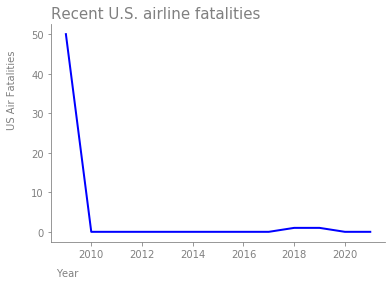

In [50]:
# us fatalities vs miles traveled
fig, ax = plt.subplots()
# ax.text(0.2, 0.2, 'Air Fatalities', transform=ax.transAxes, color='blue', fontsize=14, fontweight='bold')
# ax.text(0.5, 0.85, 'Auto Fatalities', transform=ax.transAxes, color='grey', fontsize=14, fontweight='bold')
# ax.text(0.2, 0.5, 'Air fatalities are always much lower than auto fatalties on the same scale', transform=ax.transAxes, 
#         color='navy', fontsize=12, fontweight='bold')
# ax.text(0.5, 0.4, 'Even with the 9/11 terrorist fatalities!', transform=ax.transAxes, color='navy', fontsize=12, fontweight='bold')
ax.plot(recent.Year, recent['US Fatalities'], marker='', color='blue', linewidth=2)
#ax.plot(bill.Year, bill['Vehicle Miles'], marker='o', markerfacecolor='grey', markersize=12, color='grey', linewidth=4)
#markers_on = [0, 18]
#ax.plot(miles.Year, miles['US Air Miles'], marker='o', markerfacecolor='grey', markersize=12, markevery=markers_on, 
        #color='grey', linewidth=4)
# set details of the graph
ax.set(xlabel='Year', ylabel='US Air Fatalities')
#from matplotlib.ticker import StrMethodFormatter
ax.get_xaxis().set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_label_coords(-0.1, 0.7)
ax.xaxis.set_label_coords(0.05, -0.12)
ax.set_title('Recent U.S. airline fatalities', loc='left', fontsize=15)
plt.show()